In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer

plt.style.use("ggplot")

In [3]:
df = pd.read_csv("netflix_titles.csv", encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


/tmp/ipython-input-2322208026.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2322208026.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [6]:
# Year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Split duration
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([A-Za-z]+)')


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1342901561.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


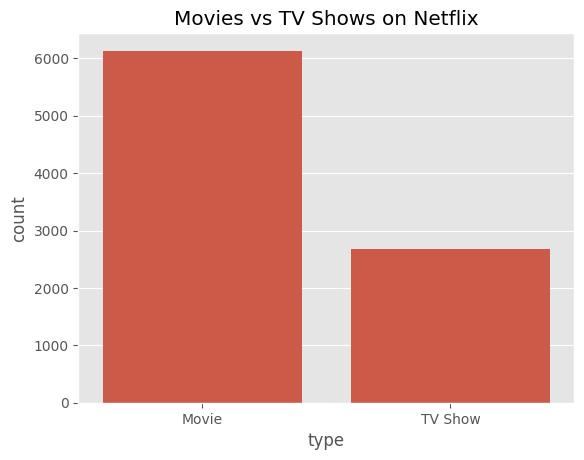

In [7]:
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


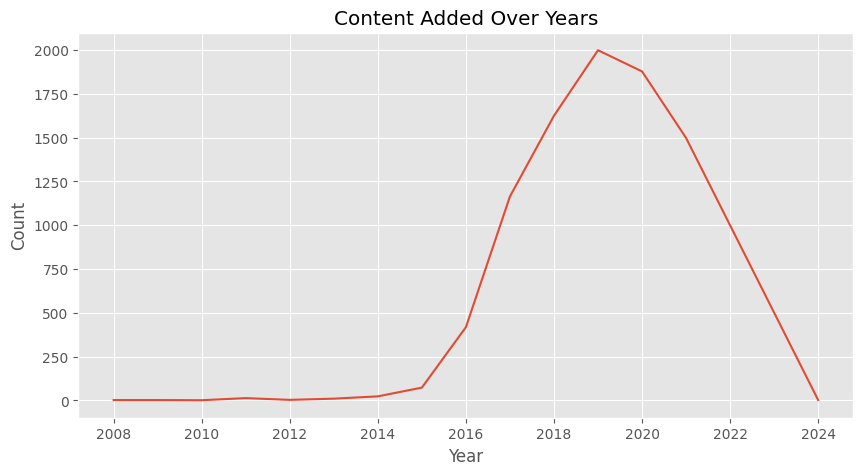

In [8]:
plt.figure(figsize=(10,5))
df.groupby('year_added')['show_id'].count().plot()
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


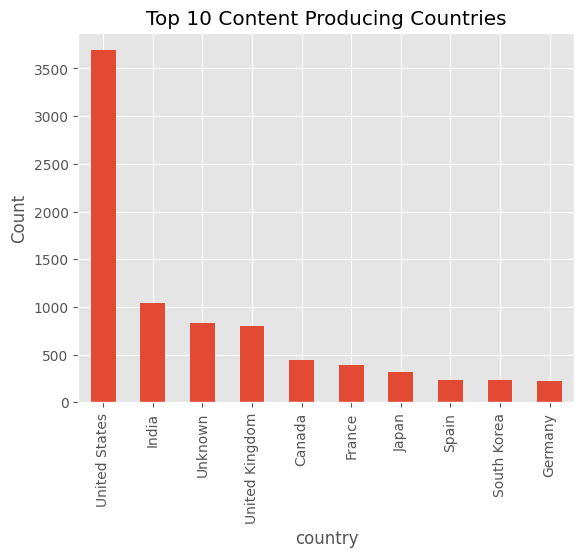

In [9]:
top_countries = df['country'].str.split(', ').explode().value_counts().head(10)

top_countries.plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.ylabel("Count")
plt.show()


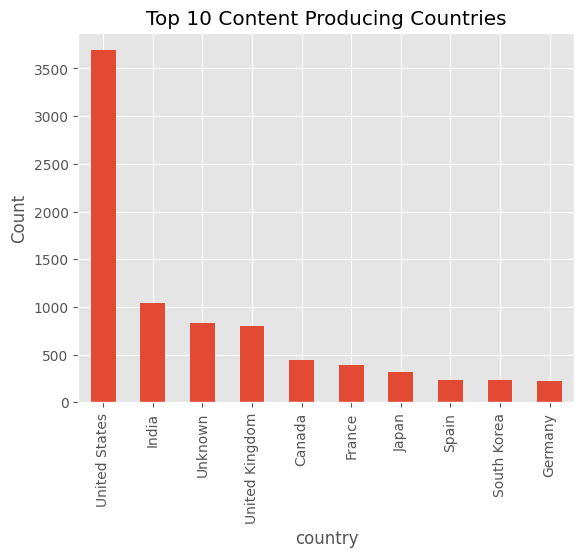

In [10]:
top_countries = df['country'].str.split(', ').explode().value_counts().head(10)

top_countries.plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.ylabel("Count")
plt.show()


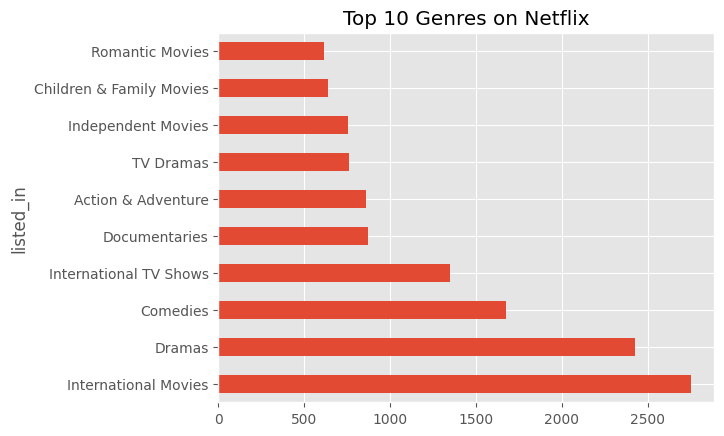

In [11]:
genres = df['listed_in'].str.split(', ').explode()
genres.value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.show()


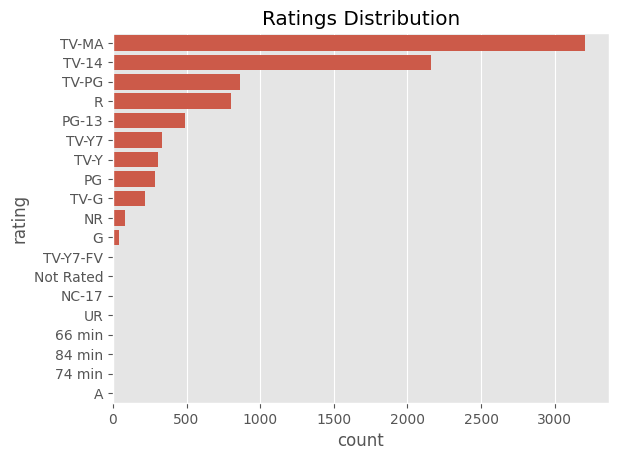

In [12]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Ratings Distribution")
plt.show()


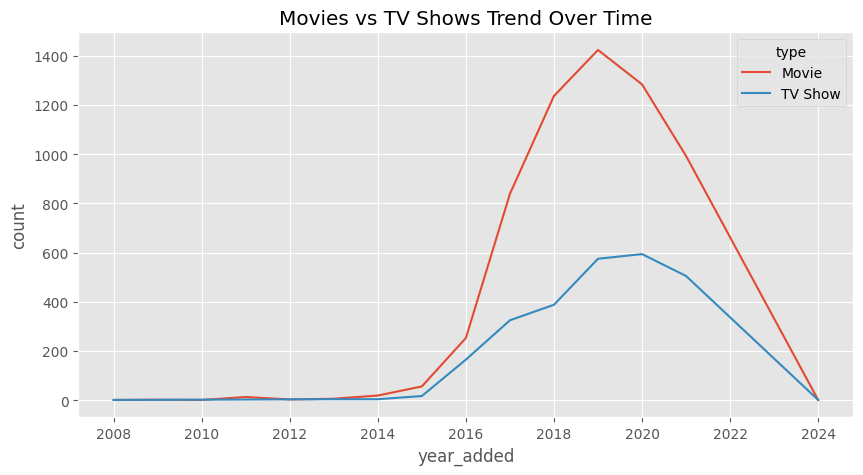

In [13]:
content_trend = df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10,5))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='type')
plt.title("Movies vs TV Shows Trend Over Time")
plt.show()


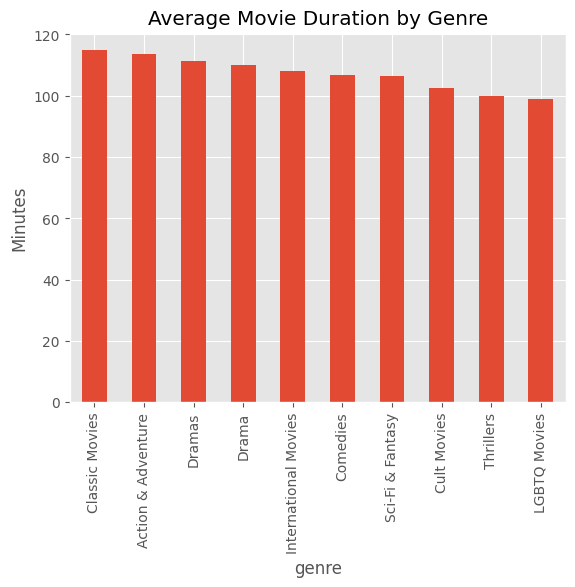

In [14]:
movies = df[df['type'] == 'Movie'].copy()
movies['genre'] = movies['listed_in'].str.split(', ').str[0]

movies.groupby('genre')['duration_num'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Average Movie Duration by Genre")
plt.ylabel("Minutes")
plt.show()


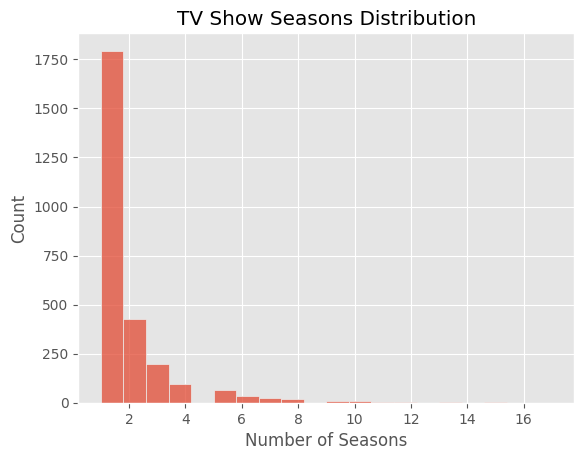

In [15]:
tv = df[df['type'] == 'TV Show']

sns.histplot(tv['duration_num'], bins=20)
plt.title("TV Show Seasons Distribution")
plt.xlabel("Number of Seasons")
plt.show()


In [16]:
genre_df = df[['show_id', 'listed_in']].copy()
genre_df['listed_in'] = genre_df['listed_in'].str.split(', ')

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(
    mlb.fit_transform(genre_df['listed_in']),
    columns=mlb.classes_
)

genre_encoded.head()


,Action,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thriller,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(genre_encoded)


In [18]:
df.groupby('cluster')['type'].value_counts()


cluster  type   
0        Movie      2458
1        TV Show    1323
         Movie      1275
2        Movie      1532
3        Movie       867
4        TV Show    1354
Name: count, dtype: int64